In [1]:
# Import Sqlite3 dan Pandas
import sqlite3
import pandas as pd

# Connect Sqlite ke Database
conn = sqlite3.connect('olist.db')

# Set jumlah kolom dan baris
pd.set_option('display.max_colwidth', 40)
pd.set_option('display.max_rows', 20)

# Tes Koneksi Sqlite3
pd.read_sql_query(
#"CREATE TEMPORARY TABLE location_table AS "
"SELECT customer_zip_code_prefix, customer_city, customer_state FROM 'olist_order_customer_dataset' "
"WHERE customer_state = 'MG' "
"GROUP BY customer_city "
, conn)

,customer_zip_code_prefix,customer_city,customer_state
0,38540,abadia dos dourados,MG
1,35620,abaete,MG
2,35365,abre campo,MG
3,35438,acaiaca,MG
4,35147,acucena,MG
...,...,...,...
740,39730,virginopolis,MG
741,39715,virgolandia,MG
742,36520,visconde do rio branco,MG
743,36264,vitorinos,MG


##  DATA WRANGLING 

In [2]:
 # Membuat Temp Table mengenai data penjualan
table_penjualan = (
    "CREATE TEMPORARY TABLE table_penjualan AS "
    
    # SELECT 
    "SELECT od.order_id, pd.product_category_name_english, op.product_photos_qty, od.order_item_id, "
    "od.price, od.order_item_id * od.price AS total_purchase, "
    "opy.payment_sequential, opy.payment_type, opy.payment_installments, opy.payment_value "
    "FROM olist_products_dataset AS op "
    
    # To Display Nama Item
    "JOIN olist_order_items_dataset AS od ON op.product_id = od.product_id "
    
    #To Display Nama Item Bahasa Inggris
    "JOIN product_category_name_translation AS pd ON op.product_category_name = pd.product_category_name "
    
    #To Display Detail Pembayaran
    "JOIN olist_order_payments_dataset AS opy ON od.order_id = opy.order_id"
)
conn.execute(table_penjualan)

In [3]:
# Display Table
pd.read_sql_query(
"SELECT * FROM table_penjualan "
,conn)

,order_id,product_category_name_english,product_photos_qty,order_item_id,price,total_purchase,payment_sequential,payment_type,payment_installments,payment_value
0,e17e4f88e31525f7deef66779844ddce,perfumery,1.0,1,10.91,10.91,1,debit_card,1,18.30
1,5236307716393b7114b53ee991f36956,art,1.0,1,248.00,248.00,1,voucher,1,265.99
2,01f66e58769f84129811d43eefd187fb,sports_leisure,1.0,1,79.80,79.80,1,credit_card,1,87.62
3,143d00a4f2dde4e0364ee1821577adb3,baby,1.0,1,112.30,112.30,1,credit_card,2,121.84
4,86cafb8794cb99a9b1b77fc8e48fbbbb,housewares,4.0,1,37.90,37.90,1,credit_card,4,46.19
...,...,...,...,...,...,...,...,...,...,...
115873,59e88b7d3675e89aceaf86f372d3bc9a,computers_accessories,2.0,2,29.90,59.80,1,boleto,1,92.02
115874,6e4465d771f02e4fe335225de3c6c043,computers_accessories,2.0,1,29.90,29.90,1,boleto,1,159.54
115875,6e4465d771f02e4fe335225de3c6c043,computers_accessories,2.0,2,29.90,59.80,1,boleto,1,159.54
115876,6e4465d771f02e4fe335225de3c6c043,computers_accessories,2.0,3,29.90,89.70,1,boleto,1,159.54


In [4]:
# CREATE TABLE WAKTU PENJUALAN
tabel_waktu_penjualan = pd.read_sql_query( 
    # Select Colum yang bersangkutan
    "CREATE TEMPORARY TABLE table_waktu AS "
    "SELECT od.order_id, od.order_approved_at, od.order_delivered_customer_date, "
    "ot.seller_id, oc.customer_state, od.order_status "
    "FROM olist_order_dataset AS od "
    # Join Order Dataset
    "JOIN olist_order_items_dataset AS ot ON ot.order_id = od.order_id "
    "JOIN olist_order_customer_dataset AS oc ON oc.customer_id = od.customer_id "
, conn)

TypeError: 'NoneType' object is not iterable

In [5]:
# Display Table
pd.read_sql_query(
"SELECT * FROM table_waktu " 
,conn)

,order_id,order_approved_at,order_delivered_customer_date,seller_id,customer_state,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,2017-10-10 21:25:13,3504c0cb71d7fa48d967e0e4c94d59d9,SP,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,2018-08-07 15:27:45,289cdb325fb7e7f891c38608bf9e0962,BA,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,2018-08-17 18:06:29,4869f7a5dfa277a7dca6462dcf3b52b2,GO,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59,2017-12-02 00:28:42,66922902710d126a0e7d26b0e3805106,RN,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29,2018-02-16 18:17:02,2c9e548be18521d1c43cde1c582c6de8,SP,delivered
...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 13:10:37,2018-02-28 17:37:56,1f9ab4708f3056ede07124aad39a2554,SP,delivered
112646,83c1379a015df1e13d02aae0204711ab,2017-08-27 15:04:16,2017-09-21 11:24:17,d50d79cb34e38265a8649c383dcffd48,BA,delivered
112647,11c177c8e97725db2631073c19f07b62,2018-01-08 21:36:21,2018-01-25 23:32:54,a1043bafd471dff536d0c462352beb48,RJ,delivered
112648,11c177c8e97725db2631073c19f07b62,2018-01-08 21:36:21,2018-01-25 23:32:54,a1043bafd471dff536d0c462352beb48,RJ,delivered


In [6]:
# Menggabungkan Table Review Order dan Table Waktu Penjualan Menggunakan Order ID
tabel_penjual = (
    "CREATE TEMPORARY TABLE table_penjual AS "
    "SELECT p.order_id, tp.product_category_name_english, p.order_approved_at, p.order_delivered_customer_date, "
    "p.order_status, p.customer_state, os.seller_state, rw.review_score "
    "FROM table_waktu as p "
    # Menggabungkan Table Waktu
    "JOIN table_penjualan AS tp ON tp.order_id = p.order_id "
    "JOIN olist_sellers_dataset AS os ON os.seller_id = p.seller_id "
    # Menambahkan Review Order
    "JOIN olist_order_reviews_dataset AS rw ON rw.order_id = p.order_id "
)
conn.execute(tabel_penjual)

In [7]:
# Display Table
pd.read_sql_query(
"SELECT * FROM table_penjual "
,conn)

,order_id,product_category_name_english,order_approved_at,order_delivered_customer_date,order_status,customer_state,seller_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,housewares,2017-10-02 11:07:15,2017-10-10 21:25:13,delivered,SP,SP,4
1,e481f51cbdc54678b7cc49136f2d6af7,housewares,2017-10-02 11:07:15,2017-10-10 21:25:13,delivered,SP,SP,4
2,e481f51cbdc54678b7cc49136f2d6af7,housewares,2017-10-02 11:07:15,2017-10-10 21:25:13,delivered,SP,SP,4
3,53cdb2fc8bc7dce0b6741e2150273451,perfumery,2018-07-26 03:24:27,2018-08-07 15:27:45,delivered,BA,SP,4
4,47770eb9100c2d0c44946d9cf07ec65d,auto,2018-08-08 08:55:23,2018-08-17 18:06:29,delivered,GO,SP,5
...,...,...,...,...,...,...,...,...
160579,11c177c8e97725db2631073c19f07b62,computers_accessories,2018-01-08 21:36:21,2018-01-25 23:32:54,delivered,RJ,MG,2
160580,11c177c8e97725db2631073c19f07b62,computers_accessories,2018-01-08 21:36:21,2018-01-25 23:32:54,delivered,RJ,MG,2
160581,11c177c8e97725db2631073c19f07b62,computers_accessories,2018-01-08 21:36:21,2018-01-25 23:32:54,delivered,RJ,MG,2
160582,11c177c8e97725db2631073c19f07b62,computers_accessories,2018-01-08 21:36:21,2018-01-25 23:32:54,delivered,RJ,MG,2


In [8]:
# Menggabungkan Kedua Table menjadi Satu
pd.read_sql_query(
    # Create Temp Table
    "CREATE TEMPORARY TABLE wrang_table AS "
    
    # from table penjualan
    "SELECT tp.order_id, tp.product_category_name_english, tp.product_photos_qty, tp.order_item_id, tp.price, "	
    "tp.total_purchase, tp.payment_sequential, tp.payment_type, tp.payment_installments, tp.payment_value "

    # From table penjual
    "product_category_name_english, order_approved_at, order_delivered_customer_date, order_status, customer_state, seller_state, review_score "
    "FROM table_penjualan AS tp "
    "JOIN table_penjual AS pj ON pj.order_id = tp.order_id "
,conn)

TypeError: 'NoneType' object is not iterable

In [8]:
pd.read_sql_query(
"SELECT * FROM wrang_table "
,conn)

DatabaseError: Execution failed on sql 'SELECT * FROM wrang_table': no such table: wrang_table

## DATA CLEANING

In [10]:
# CHECK DUPLICATE
pd.read_sql_query(
    # Pilih seluruh kolom 
    "SELECT order_id, product_category_name_english, product_photos_qty, order_item_id,	price, total_purchase, payment_sequential, payment_type, payment_installments, "	
    "product_category_name_english, order_approved_at, order_delivered_customer_date, order_status, customer_state, seller_state, review_score, "
    
    # Menggunakan Count untuk mengecek jumlah data
    "COUNT(*) AS count "
    "FROM wrang_table "
    # Menggunakan order_id dan order_approved at sebagai acuan data duplokasi
    "GROUP BY order_id, order_approved_at "
    "HAVING count > 1"
    #"WHERE order_id = '001ab0a7578dd66cd4b0a71f5b6e1e41' "
,conn)

,order_id,product_category_name_english,product_photos_qty,order_item_id,price,total_purchase,payment_sequential,payment_type,payment_installments,product_category_name_english,order_approved_at,order_delivered_customer_date,order_status,customer_state,seller_state,review_score,count
0,0008288aa423d2a3f00fcb17cd7d8719,garden_tools,2.0,1,49.90,49.90,1,boleto,1,garden_tools,2018-02-15 03:55:52,2018-02-26 13:55:22,delivered,SP,SP,5,8
1,0016dfedd97fc2950e388d2971d718c7,garden_tools,1.0,1,49.75,49.75,1,credit_card,5,garden_tools,2017-04-29 10:05:12,2017-05-22 18:32:21,delivered,BA,SP,5,4
2,001ab0a7578dd66cd4b0a71f5b6e1e41,electronics,2.0,1,24.89,24.89,1,boleto,1,electronics,2017-12-28 02:33:42,2018-01-17 20:43:29,delivered,BA,DF,4,27
3,001d8f0e34a38c37f7dba2a37d4eba8b,health_beauty,3.0,1,18.99,18.99,1,credit_card,2,health_beauty,2017-05-14 17:35:11,2017-05-26 13:14:50,delivered,SP,SP,1,8
4,002c9def9c9b951b1bec6d50753c9891,housewares,3.0,1,78.00,78.00,1,credit_card,1,housewares,2018-05-15 17:37:51,2018-05-18 14:37:38,delivered,SP,SP,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12625,ffd84ab39cd5e873d8dba24342e65c01,computers_accessories,3.0,1,24.90,24.90,1,credit_card,1,computers_accessories,2017-10-05 19:49:17,2017-10-09 16:19:25,delivered,SP,SP,5,8
12626,ffe4b41e99d39f0b837a239110260530,toys,3.0,1,19.00,19.00,1,credit_card,1,toys,2017-08-31 21:25:40,2017-09-11 20:57:51,delivered,RJ,DF,4,8
12627,ffecd5a79a0084f6a592288c67e3c298,electronics,1.0,1,21.90,21.90,1,credit_card,1,electronics,2018-02-27 20:15:27,2018-03-29 14:37:05,delivered,BA,SP,2,27
12628,fff8287bbae429a99bb7e8c21d151c41,computers_accessories,4.0,1,180.00,180.00,1,credit_card,4,computers_accessories,2018-03-17 12:29:22,2018-04-07 10:07:48,delivered,PB,SP,5,8


In [129]:
# KONFIRMASI DUPLICATE
pd.read_sql_query(
    # Pilih seluruh kolom 
    "SELECT order_id,  payment_installments, "	
    "product_category_name_english, order_approved_at, order_delivered_customer_date, order_status, customer_state, seller_state "
    "FROM wrang_table "
    
    # Sample Data duplokat 
    "WHERE order_id = '001ab0a7578dd66cd4b0a71f5b6e1e41' "
,conn)

,order_id,payment_installments,product_category_name_english,order_approved_at,order_delivered_customer_date,order_status,customer_state,seller_state
0,001ab0a7578dd66cd4b0a71f5b6e1e41,1,electronics,2017-12-28 02:33:42,2018-01-17 20:43:29,delivered,BA,DF
1,001ab0a7578dd66cd4b0a71f5b6e1e41,1,electronics,2017-12-28 02:33:42,2018-01-17 20:43:29,delivered,BA,DF
2,001ab0a7578dd66cd4b0a71f5b6e1e41,1,electronics,2017-12-28 02:33:42,2018-01-17 20:43:29,delivered,BA,DF
3,001ab0a7578dd66cd4b0a71f5b6e1e41,1,electronics,2017-12-28 02:33:42,2018-01-17 20:43:29,delivered,BA,DF
4,001ab0a7578dd66cd4b0a71f5b6e1e41,1,electronics,2017-12-28 02:33:42,2018-01-17 20:43:29,delivered,BA,DF
...,...,...,...,...,...,...,...,...
22,001ab0a7578dd66cd4b0a71f5b6e1e41,1,electronics,2017-12-28 02:33:42,2018-01-17 20:43:29,delivered,BA,DF
23,001ab0a7578dd66cd4b0a71f5b6e1e41,1,electronics,2017-12-28 02:33:42,2018-01-17 20:43:29,delivered,BA,DF
24,001ab0a7578dd66cd4b0a71f5b6e1e41,1,electronics,2017-12-28 02:33:42,2018-01-17 20:43:29,delivered,BA,DF
25,001ab0a7578dd66cd4b0a71f5b6e1e41,1,electronics,2017-12-28 02:33:42,2018-01-17 20:43:29,delivered,BA,DF


In [13]:
# CHECK delivery status
pd.read_sql_query(
    # Pilih seluruh kolom 
    "SELECT order_id, product_category_name_english, product_photos_qty, order_item_id,	price, total_purchase, payment_sequential, payment_type, payment_installments, "	
    "product_category_name_english, order_approved_at, order_delivered_customer_date, order_status, customer_state, seller_state, review_score "
    "FROM wrang_table "
    
    # Melihat status order yang tidak terkirim
    "WHERE order_status <> 'delivered'"
    #"GROUP BY order_status "
,conn)

,order_id,product_category_name_english,product_photos_qty,order_item_id,price,total_purchase,payment_sequential,payment_type,payment_installments,product_category_name_english,order_approved_at,order_delivered_customer_date,order_status,customer_state,seller_state,review_score
0,a2e4c44360b4a57bdff22f3a4630c173,computers_accessories,1.0,1,19.85,19.85,1,credit_card,1,computers_accessories,2017-02-06 20:30:19,None,approved,MG,MG,1
1,eba9f7d9010e498a2fdd4a48583db537,housewares,1.0,1,79.99,79.99,1,credit_card,1,housewares,2018-01-29 16:36:49,None,canceled,RJ,PR,1
2,e17e4f88e31525f7deef66779844ddce,perfumery,1.0,1,10.91,10.91,1,debit_card,1,perfumery,2018-04-24 19:04:19,2018-04-27 16:42:17,delivered,SP,SP,5
3,e005be792ff63719b707213974186c8d,perfumery,1.0,1,275.00,275.00,1,credit_card,8,perfumery,2018-05-10 17:15:14,None,invoiced,SP,SC,1
4,7f59962b8f02ca840674b28f1b9cda2b,housewares,2.0,1,139.99,139.99,1,credit_card,7,housewares,2018-03-12 17:03:05,None,processing,SP,SP,1
5,08af87fbe33eeebc7840433d94718046,furniture_decor,2.0,1,139.90,139.90,1,credit_card,4,furniture_decor,2017-04-20 13:10:48,None,shipped,SC,SP,3
6,1a47da1d66c70489c8e35fe2b5433ab7,perfumery,1.0,1,249.90,249.90,1,credit_card,5,perfumery,2016-10-07 18:53:48,None,unavailable,RS,RJ,5


In [14]:
# CLEANING DATA
pd.read_sql_query(
    #Buat Temp table clean data
    "CREATE TEMPORARY TABLE temp_clean AS "
    
    # Menggunakan Fungsi DISTINCT untuk menghilangkan duplikat data
    "SELECT DISTINCT order_id, product_category_name_english, product_photos_qty, order_item_id,	price, total_purchase, payment_sequential, payment_type, payment_installments, "	
    "product_category_name_english, order_approved_at, order_delivered_customer_date, order_status, customer_state, seller_state, review_score "
    "FROM wrang_table "
    
    # Menghilangkan order yang dibatalkan atau tidak tersedia
    "WHERE order_status <> 'canceled' OR 'unavailable' "
    
    # Mengelompokkan dengan menggunakan order_id 
    "GROUP BY order_id "
, conn )

TypeError: 'NoneType' object is not iterable

In [15]:
# CHECK CLEAN TABLE
pd.read_sql_query(
    # Pilih Seluruh Column
    "SELECT order_id, product_category_name_english, product_photos_qty, order_item_id,	price, total_purchase, payment_sequential, payment_type, payment_installments, "	
    "product_category_name_english, order_approved_at, order_delivered_customer_date, order_status, customer_state, seller_state, review_score, "

    # Check Dupicate
    "COUNT(*) AS count "
    "FROM temp_clean "

    #"WHERE order_status = 'canceled' OR 'unavailable' "
    "GROUP BY order_id "
    "HAVING count <> 1 "
,conn)

,order_id,product_category_name_english,product_photos_qty,order_item_id,price,total_purchase,payment_sequential,payment_type,payment_installments,product_category_name_english,order_approved_at,order_delivered_customer_date,order_status,customer_state,seller_state,review_score,count


In [16]:
# CREATE CLEAN TABLE 
table_cleaned = (
    # Membuat Table Baru
    "CREATE TABLE table_bersih3 AS "
    # Select Seluruh Kolom
    "SELECT product_category_name_english, product_photos_qty, order_item_id, price, total_purchase, payment_sequential, payment_type, payment_installments, "	
    "order_approved_at, order_delivered_customer_date, order_status, customer_state, seller_state, review_score "
    # Dari Temp Table yang sudah bersih
    "FROM temp_clean "
)
conn.execute(table_cleaned)

OperationalError: table table_bersih3 already exists

In [17]:
table_bersih4 = pd.read_sql_query(
    # Update Table Bersih
    "CREATE TABLE table_bersih4 AS "
    "SELECT * FROM table_bersih3 "
    # Menghilangkan data pengiriman yang kosong
    "WHERE order_approved_at AND order_delivered_customer_date IS NOT NULL "
, conn)

DatabaseError: Execution failed on sql 'CREATE TABLE table_bersih4 AS SELECT * FROM table_bersih3 WHERE order_approved_at AND order_delivered_customer_date IS NOT NULL ': table table_bersih4 already exists

## Data Visualisation

In [2]:
# Menggunakan Seaborn dan Matplotlib untuk Visualisai
import seaborn as sns
import matplotlib.pyplot as plt

### Total Purchased item

In [19]:
# Total Penjualan Item berdasarkan Nominal
data_sold_dollar = pd.read_sql_query(
    "SELECT product_category_name_english, SUM(order_item_id * price) AS total_sold FROM table_bersih4 "
    "GROUP BY product_category_name_english "
    "ORDER BY total_sold DESC"
,conn)

In [20]:
data_sold_dollar

,product_category_name_english,total_sold
0,health_beauty,1171706.09
1,watches_gifts,1132300.34
2,bed_bath_table,910586.38
3,sports_leisure,885242.81
4,computers_accessories,765794.30
...,...,...
66,flowers,885.24
67,home_comfort_2,695.77
68,cds_dvds_musicals,640.00
69,fashion_childrens_clothes,479.96


C:\Users\farha\AppData\Local\Temp\ipykernel_6328\3033034286.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[i] += f" ({v:,})"


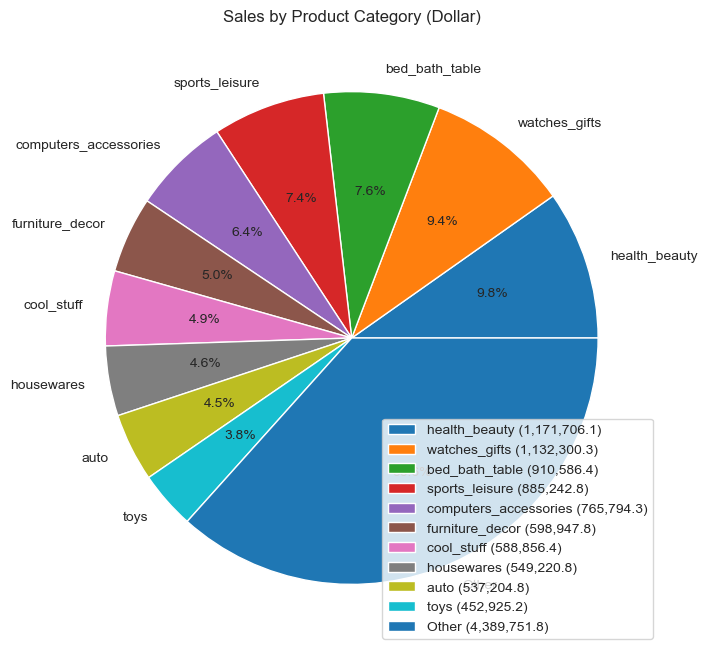

In [22]:
# Me-trim data menjadi 10 teratas penjualan
top_product = data_sold_dollar.nlargest(10, 'total_sold')

# Menghitung jumlah total 'other' item
other_product = data_sold_dollar['total_sold'].sum() - top_product['total_sold'].sum()

# Menambahkan 'other' item ke dalam dataframe
top_product.loc[len(top_product)] = ['Other', other_product]

# Membulatkan angka penjualan
top_product['total_sold_rounded'] = round(top_product['total_sold'], 1)

# Membuat Pie Chart dengan Seaborn
fig_sales_dollar = plt.figure(figsize=(10, 8))
plt.title("Sales by Product Category (Dollar)")
sns.set_style("whitegrid")
sns.color_palette("pastel")
plt.pie(top_product['total_sold'], labels=top_product['product_category_name_english'], autopct='%1.1f%%')

# Menambahkan Nilai Label
values = top_product['total_sold_rounded']
labels = top_product['product_category_name_english']
for i, v in enumerate(values):
    labels[i] += f" ({v:,})"

plt.legend(labels=labels, loc="best")
plt.show()
fig_sales_dollar.savefig('sales_item_sold.png')

In [23]:
# Total Sold Item
data_sold_item = pd.read_sql_query(
    "SELECT product_category_name_english, COUNT(*) AS item_sold FROM table_bersih4 "
    "GROUP BY product_category_name_english "
    "ORDER BY item_sold DESC"
,conn)

In [24]:
data_sold_item

,product_category_name_english,item_sold
0,bed_bath_table,9094
1,health_beauty,8569
2,sports_leisure,7445
3,computers_accessories,6476
4,furniture_decor,6161
...,...,...
66,arts_and_craftmanship,22
67,cds_dvds_musicals,12
68,la_cuisine,11
69,fashion_childrens_clothes,6


C:\Users\farha\AppData\Local\Temp\ipykernel_6328\1677770049.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[i] += f" ({v:,})"


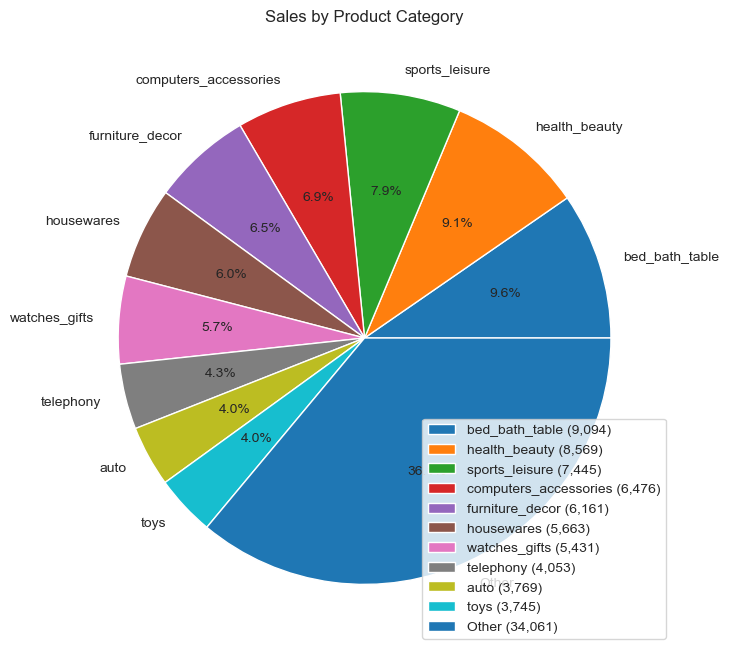

In [25]:
# Me-trim data menjadi 10 teratas penjualan
top_item = data_sold_item.nlargest(10, 'item_sold')

# Menghitung jumlah total 'other' item
other_item = data_sold_item['item_sold'].sum() - top_item['item_sold'].sum()

# Menambahkan 'other' item ke dalam dataframe
top_item.loc[len(top_item)] = ['Other', other_item]

# Membuat Pie Chart dengan Seaborn
fig_sales_item = plt.figure(figsize=(10, 8))
plt.title("Sales by Product Category")
sns.set_style("whitegrid")
sns.color_palette("pastel")
plt.pie(top_item['item_sold'], labels=top_item['product_category_name_english'], autopct='%1.1f%%')

# Menambahkan Nilai Ke Label
values = top_item['item_sold']
labels = top_item['product_category_name_english']
for i, v in enumerate(values):
    labels[i] += f" ({v:,})"

plt.legend(labels=labels, loc="best")
plt.show()
fig_sales_item.savefig('sales_item_amount.png')

### Time Purchased

In [26]:
# Memilih data Penjualan berdasarkan tanggal diterimanya order
health_beauty_time = pd.read_sql_query(
    # Memilih data bulam dari tanggal
    "SELECT product_category_name_english, order_approved_at, COUNT(*) AS time_sold, strftime('%m', order_approved_at) AS months FROM table_bersih4 "
    "WHERE product_category_name_english = 'health_beauty' "
    "GROUP BY months "
    "ORDER BY order_approved_at "
    ,conn)

# Mengubah date format pada kolom order_approved_at
health_beauty_time['order_approved_at'] = pd.to_datetime(health_beauty_time['order_approved_at'])

# Menambahkan kolom yang berisi bulan dan tahun 
health_beauty_time['month_year'] = health_beauty_time['order_approved_at'].dt.strftime('%m-%Y')

In [69]:
# read in the data
health_beauty_time = pd.read_sql_query(
    "SELECT product_category_name_english, order_approved_at, COUNT(*) AS time_sold, strftime('%m', order_approved_at) AS months FROM table_bersih4 "
    "WHERE product_category_name_english = 'health_beauty' "
    "GROUP BY months "
    "ORDER BY order_approved_at "
    ,conn)

# create a range of dates covering all the months in the time period
min_date = health_beauty_time['order_approved_at'].min()
max_date = health_beauty_time['order_approved_at'].max()
date_range = pd.date_range(min_date, max_date, freq='MS')

# create a DataFrame with the full set of months
all_months = pd.DataFrame({'months': date_range.strftime('%m'), 'year_month': date_range.strftime('%Y-%m')})

# merge with the existing DataFrame
merged = pd.merge(all_months, health_beauty_time, how='left', on='months')

# check for missing data
missing = merged[merged['product_category_name_english'].isnull()]
if len(missing) > 0:
    print(f"Missing data for months: {', '.join(missing['year_month'].unique())}")
else:
    print("All months are covered")

All months are covered


In [27]:
health_beauty_time

,product_category_name_english,order_approved_at,time_sold,months,month_year
0,health_beauty,2017-02-22 10:50:13,731,02,02-2017
1,health_beauty,2017-05-14 17:35:11,942,05,05-2017
2,health_beauty,2017-06-28 23:43:34,1013,06,06-2017
3,health_beauty,2017-09-27 15:49:42,359,09,09-2017
4,health_beauty,2017-10-23 15:14:13,351,10,10-2017
5,health_beauty,2017-11-18 20:46:08,504,11,11-2017
6,health_beauty,2017-12-26 13:49:27,435,12,12-2017
7,health_beauty,2018-01-01 18:11:33,626,01,01-2018
8,health_beauty,2018-03-20 18:35:21,793,03,03-2018
9,health_beauty,2018-04-10 18:15:20,754,04,04-2018


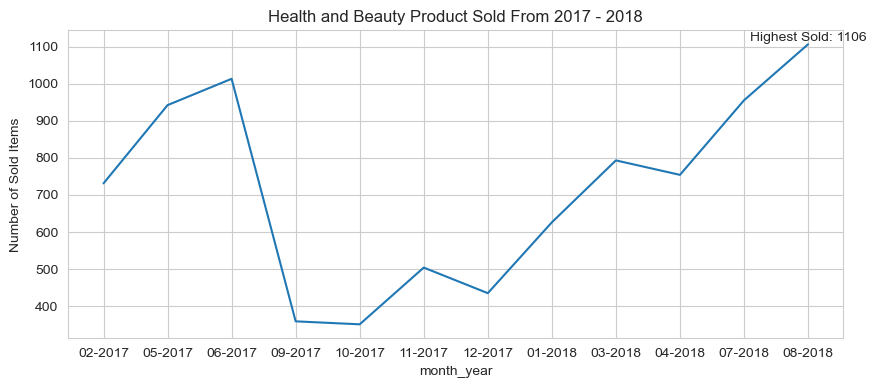

In [35]:
# Membuat Line Chart
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(health_beauty_time['month_year'], health_beauty_time['time_sold'])

# Menetapkan axis x dan y label
ax.set_title("Health and Beauty Product Sold From 2017 - 2018")
ax.set_xlabel('month_year')
ax.set_ylabel('Number of Sold Items')

# Mencari Jumlah Penjualan Tertinggi
max_index = health_beauty_time['time_sold'].idxmax()
max_value = health_beauty_time.loc[max_index, 'time_sold']

# Menambahkan dan Menampilkan Jumlah Penjualan Tertinggi
ax.text(max_index, max_value, f"Highest Sold: {max_value}", ha='center', va='bottom')

# Display line chart
plt.show()
fig.savefig('health_beauty_time.png')

In [29]:
bed_bath_table_time = pd.read_sql_query(
    "SELECT product_category_name_english, order_approved_at, COUNT(*) AS time_sold, strftime('%m', order_approved_at) AS months FROM table_bersih4 "
    "WHERE product_category_name_english = 'bed_bath_table' "
    "GROUP BY product_category_name_english, months "
    "ORDER BY order_approved_at "
    ,conn)

# Mengubah date format pada kolom order_approved_at
bed_bath_table_time['order_approved_at'] = pd.to_datetime(bed_bath_table_time['order_approved_at'])

# Menambahkan kolom yang berisi bulan dan tahun
bed_bath_table_time['month_year'] = bed_bath_table_time['order_approved_at'].dt.strftime('%m-%Y')

In [30]:
bed_bath_table_time

,product_category_name_english,order_approved_at,time_sold,months,month_year
0,bed_bath_table,2017-05-12 23:50:08,920,05,05-2017
1,bed_bath_table,2017-08-17 01:25:39,983,08,08-2017
2,bed_bath_table,2017-09-25 17:50:16,447,09,09-2017
3,bed_bath_table,2017-10-14 22:03:58,439,10,10-2017
4,bed_bath_table,2017-11-24 22:38:47,771,11,11-2017
5,bed_bath_table,2017-12-14 16:54:49,481,12,12-2017
6,bed_bath_table,2018-01-17 03:35:47,701,01,01-2018
7,bed_bath_table,2018-02-06 18:30:33,723,02,02-2018
8,bed_bath_table,2018-03-23 20:07:49,875,03,03-2018
9,bed_bath_table,2018-04-27 21:52:36,810,04,04-2018


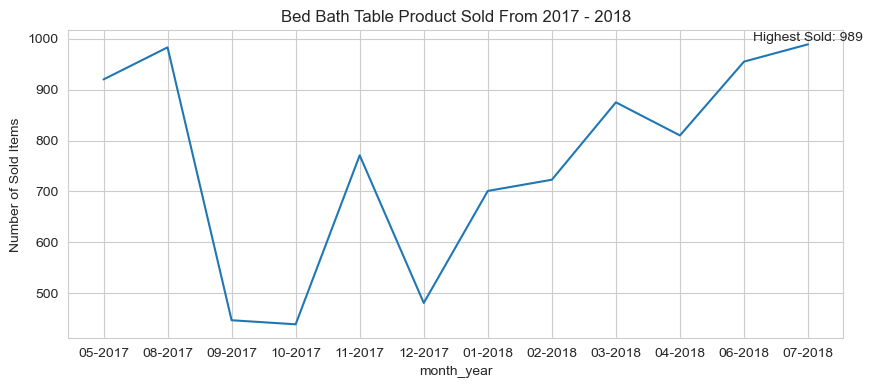

In [34]:
# Membuat Line Chart
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(bed_bath_table_time['month_year'], bed_bath_table_time['time_sold'])

# Menetapkan Axis y dan x label
ax.set_title("Bed Bath Table Product Sold From 2017 - 2018")
ax.set_xlabel('month_year')
ax.set_ylabel('Number of Sold Items')

# Mencari Jumlah Penjualan Tertinggi
max_index = bed_bath_table_time['time_sold'].idxmax()
max_value = bed_bath_table_time.loc[max_index, 'time_sold']

# Menambahkan dan Menampilkan Jumlah Penjualan Tertinggi
ax.text(max_index, max_value, f"Highest Sold: {max_value}", ha='center', va='bottom')

# Menyimpan dan menampilkan Chart
plt.show()
fig.savefig('bed_bath_time.png')

### Prices Range 

In [4]:
health_beauty_price = pd.read_sql_query(
    # Mengelompokkan penjualan berdasarkan Rentang Harga
    "SELECT CASE "
    "WHEN price <= 50 THEN '0-50' "
    "WHEN price <= 100 THEN '50-100' "
    "WHEN price <= 200 THEN '100-200' "
    "WHEN price <= 300 THEN '200-300' "
    "WHEN price <= 400 THEN '300-400' "
    "WHEN price <= 500 THEN '400-500' "
    "WHEN price <= 600 THEN '500-600' "
    "WHEN price <= 700 THEN '600-700' "
    "WHEN price <= 800 THEN '700-800' "
    "WHEN price <= 900 THEN '800-900' "
    "WHEN price <= 1000 THEN '900-1000' "
    "ELSE '1000+' "
    "END AS 'price_range', COUNT(*) AS item_sold "
    "FROM table_bersih4 "
    "WHERE product_category_name_english = 'health_beauty' "
    "GROUP BY price_range "
    # Mengutkan Berdasarkan Rentang Harga
    "ORDER BY CASE "
    "WHEN price_range = '0-50' THEN 1 "
    "WHEN price_range = '50-100' THEN 2 "
    "WHEN price_range = '100-200' THEN 3 "
    "WHEN price_range = '200-300' THEN 4 "
    "WHEN price_range = '300-400' THEN 5 "
    "WHEN price_range = '400-500' THEN 6 "
    "WHEN price_range = '500-600' THEN 7 "
    "WHEN price_range = '600-700' THEN 8 "
    "WHEN price_range = '700-800' THEN 9 "
    "WHEN price_range = '800-900' THEN 10 "
    "WHEN price_range = '900-1000' THEN 11 "
    "ELSE 12 "
    "END"
    ,conn)

In [5]:
health_beauty_price

,price_range,item_sold
0,0-50,2538
1,50-100,2792
2,100-200,1899
3,200-300,316
4,300-400,559
5,400-500,112
6,500-600,158
7,600-700,42
8,700-800,40
9,800-900,21


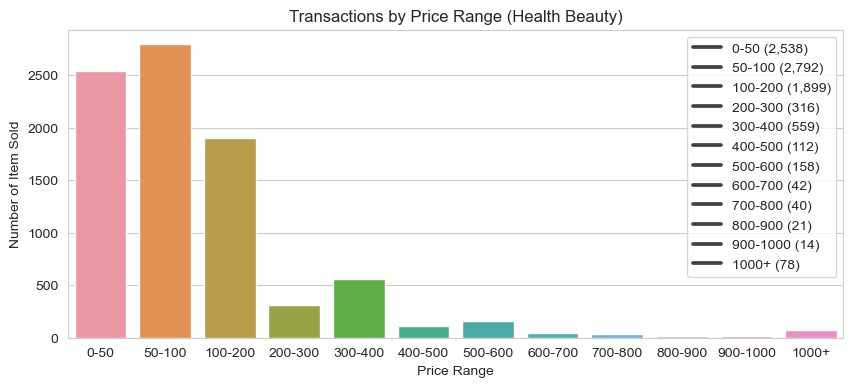

In [7]:
# Untuk Menghilangkan Jumlah Penjualan yang ter-display di x label
sns.set_style("whitegrid")

# Membuat Ukuran Chart
plt.figure(figsize=(10, 4))

# Membuat Chart
sns.barplot(x="price_range", y="item_sold", data=health_beauty_price)

# Menambahkan Label dan Title
plt.xlabel("Price Range")
plt.ylabel("Number of Item Sold")
plt.title("Transactions by Price Range (Health Beauty)")

# create a list to store the updated labels
updated_labels = []

# loop through the updated dataframe to update the labels with the corresponding values
for i, row in health_beauty_price.iterrows():
    updated_label = f"{row['price_range']} ({row['item_sold']:,})"
    updated_labels.append(updated_label)

# call the legend method with the updated labels
plt.legend(labels=updated_labels, loc="best")

# show the chart
plt.savefig('price_health_beauty3.png')
plt.show()

In [13]:
bed_bath_table_price = pd.read_sql_query(
    # Mengelompokkan penjualan berdasarkan Rentang Harga
    "SELECT CASE "
    "WHEN price <= 50 THEN '0-50' "
    "WHEN price <= 100 THEN '50-100' "
    "WHEN price <= 200 THEN '100-200' "
    "WHEN price <= 300 THEN '200-300' "
    "WHEN price <= 400 THEN '300-400' "
    "WHEN price <= 500 THEN '400-500' "
    "WHEN price <= 600 THEN '500-600' "
    "WHEN price <= 700 THEN '600-700' "
    "WHEN price <= 800 THEN '700-800' "
    "WHEN price <= 900 THEN '800-900' "
    "WHEN price <= 1000 THEN '900-1000' "
    "ELSE '1000+' "
    "END AS 'price_range', COUNT(*) AS item_sold "
    "FROM table_bersih4 "
    "WHERE product_category_name_english = 'bed_bath_table' "
    "GROUP BY price_range "
    # Mengutkan Berdasarkan Rentang Harga
    "ORDER BY CASE "
    "WHEN price_range = '0-50' THEN 1 "
    "WHEN price_range = '50-100' THEN 2 "
    "WHEN price_range = '100-200' THEN 3 "
    "WHEN price_range = '200-300' THEN 4 "
    "WHEN price_range = '300-400' THEN 5 "
    "WHEN price_range = '400-500' THEN 6 "
    "WHEN price_range = '500-600' THEN 7 "
    "WHEN price_range = '600-700' THEN 8 "
    "WHEN price_range = '700-800' THEN 9 "
    "WHEN price_range = '800-900' THEN 10 "
    "WHEN price_range = '900-1000' THEN 11 "
    "ELSE 12 "
    "END"
    ,conn)

In [14]:
bed_bath_table_price

,price_range,item_sold
0,0-50,2456
1,50-100,3761
2,100-200,2284
3,200-300,477
4,300-400,47
5,400-500,26
6,500-600,16
7,600-700,9
8,700-800,1
9,800-900,5


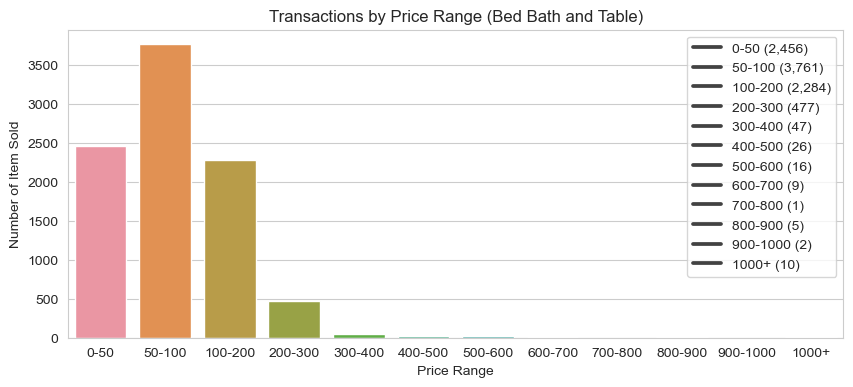

In [18]:
sns.set_style("whitegrid")

# create the figure with desired size
plt.figure(figsize=(10, 4))

# create the bar chart
sns.barplot(x="price_range", y="item_sold", data=bed_bath_table_price)

# add labels and title
plt.xlabel("Price Range")
plt.ylabel("Number of Item Sold")
plt.title("Transactions by Price Range (Bed Bath and Table)")

# create a list to store the updated labels
updated_labels = []

# loop through the updated dataframe to update the labels with the corresponding values
for i, row in bed_bath_table_price.iterrows():
    updated_label = f"{row['price_range']} ({row['item_sold']:,})"
    updated_labels.append(updated_label)

# call the legend method with the updated labels
plt.legend(labels=updated_labels, loc="best")

# show the chart
plt.savefig('price_bed_bath2.png')
plt.show()

### Photo Quantity

In [95]:
# Jumlah Penjualan Berdasarkan Jumlah Foto
photo_health_beauty = pd.read_sql_query(
    "SELECT 'Num Of Photo ' || product_photos_qty AS product_photos_qty, COUNT(*) AS number_sold "
    "FROM table_bersih4 "
    "WHERE product_category_name_english = 'health_beauty' "
    "GROUP BY product_photos_qty "
    "ORDER BY number_sold DESC"
, conn)

In [96]:
photo_health_beauty

,product_photos_qty,number_sold
0,Num Of Photo 1.0,5470
1,Num Of Photo 2.0,1049
2,Num Of Photo 3.0,1036
3,Num Of Photo 4.0,367
4,Num Of Photo 6.0,280
5,Num Of Photo 5.0,275
6,Num Of Photo 7.0,44
7,Num Of Photo 10.0,25
8,Num Of Photo 8.0,17
9,Num Of Photo 9.0,6


C:\Users\farha\AppData\Local\Temp\ipykernel_6328\1002748271.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_photo = top_photo.append(other_row, ignore_index=True)


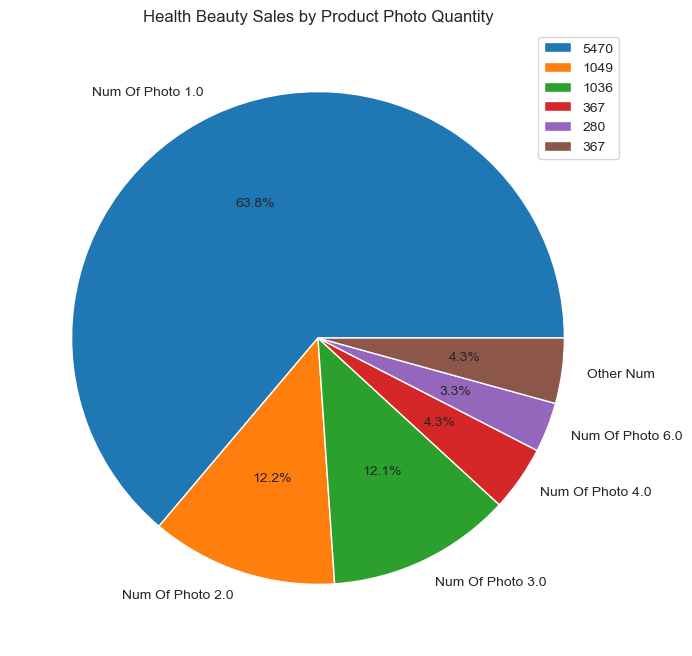

In [99]:
# Men-trim Data menjadi 5 teratas
top_photo = photo_health_beauty.head(5)

# Menghtung Jumlah item_sold untuk jumlah lainnya
other_sales = photo_health_beauty['number_sold'].sum() - top_photo['number_sold'].sum()

# Membuat Baris baru
other_row = {'product_photos_qty': 'Other Num', 'number_sold': other_sales}

# Menambahkannya ke dataframe
top_photo = top_photo.append(other_row, ignore_index=True)

# Membuat Pie Chart
photo_health = plt.figure(figsize=(8, 8))
plt.title("Health Beauty Sales by Product Photo Quantity")
sns.set_style("whitegrid")
plt.pie(top_photo['number_sold'], labels=top_photo['product_photos_qty'], autopct='%1.1f%%')
plt.legend(labels=top_photo['number_sold'], loc="best")
plt.savefig('health_beauty_photo.png')
plt.show()

In [105]:
# Jumlah Penjualan Berdasarkan Jumlah Foto
photo_bed_bath_table = pd.read_sql_query(
    "SELECT 'Num Of Photo ' || product_photos_qty AS product_photos_qty, COUNT(*) AS number_sold "
    "FROM table_bersih4 "
    "WHERE product_category_name_english = 'bed_bath_table' "
    "GROUP BY product_photos_qty "
    "ORDER BY number_sold DESC"
,conn)

In [106]:
photo_bed_bath_table

,product_photos_qty,number_sold
0,Num Of Photo 1.0,6645
1,Num Of Photo 2.0,1471
2,Num Of Photo 5.0,422
3,Num Of Photo 3.0,298
4,Num Of Photo 4.0,172
5,Num Of Photo 6.0,58
6,Num Of Photo 8.0,21
7,Num Of Photo 9.0,5
8,Num Of Photo 7.0,2


C:\Users\farha\AppData\Local\Temp\ipykernel_6328\614414980.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_photo = top_photo.append(other_row, ignore_index=True)


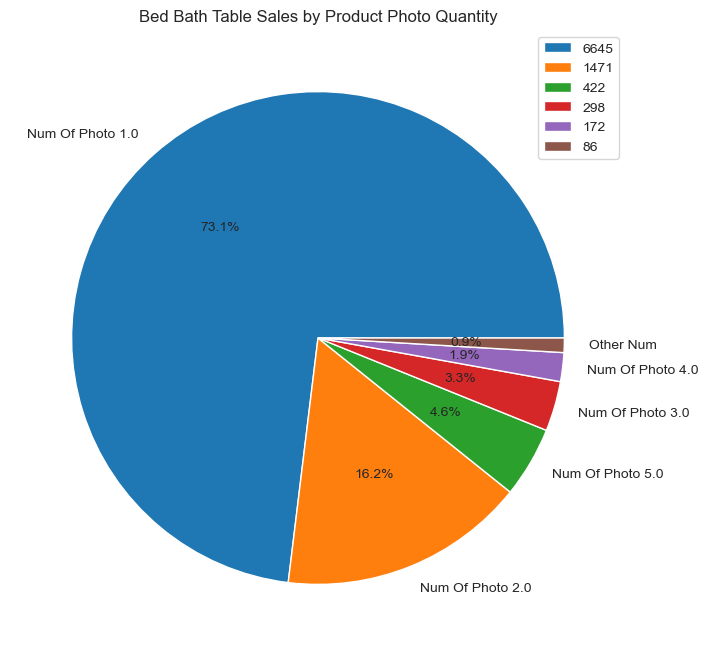

In [107]:
# Men-trim Data menjadi 5 teratas
top_photo = photo_bed_bath_table.head(5)

# Menghtung Jumlah item_sold untuk jumlah lainnya
other_sales = photo_bed_bath_table['number_sold'].sum() - top_photo['number_sold'].sum()

# Membuat Baris baru
other_row = {'product_photos_qty': 'Other Num', 'number_sold': other_sales}

# Menambahkannya ke dataframe
top_photo = top_photo.append(other_row, ignore_index=True)

# Membuat Pie Chart
plt.figure(figsize=(8, 8))
plt.title("Bed Bath Table Sales by Product Photo Quantity")
sns.set_style("whitegrid")
plt.pie(top_photo['number_sold'], labels=top_photo['product_photos_qty'], autopct='%1.1f%%')
plt.legend(labels=top_photo['number_sold'], loc="best")
plt.savefig('bath_bed_table_photo.png')
plt.show()

### Payment Type

In [108]:
# Membuat Tabel Tipe Pembayaran
payment_health_beauty = pd.read_sql_query(
    "SELECT payment_type, COUNT(*) AS number_of_transaction FROM table_bersih4 "
    "WHERE product_category_name_english = 'health_beauty' "
    "GROUP BY payment_type "
    "ORDER BY number_of_transaction DESC"
,conn)

In [109]:
payment_health_beauty

,payment_type,number_of_transaction
0,credit_card,6680
1,boleto,1650
2,debit_card,139
3,voucher,100


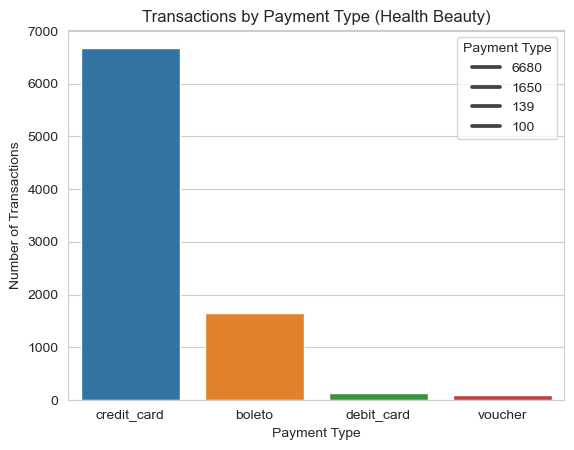

In [110]:
# Set style chart
sns.set_style("whitegrid")

# Membuat Barchart
sns.barplot(x="payment_type", y="number_of_transaction", data=payment_health_beauty)

# Menambahkan Label
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.title("Transactions by Payment Type (Health Beauty)")
plt.legend(title="Payment Type", labels=payment_health_beauty["number_of_transaction"])

# Menampilkan Chart
plt.savefig('health_beauty_payment.png')
plt.show()

In [112]:
# Membuat Tabel Tipe Pembayaran
payment_bed_bath_table = pd.read_sql_query(
    "SELECT payment_type, COUNT(*) AS number_of_transaction FROM table_bersih4 "
    "WHERE product_category_name_english = 'bed_bath_table' "
    "GROUP BY payment_type "
    "ORDER BY number_of_transaction DESC "
,conn)

In [113]:
payment_bed_bath_table

,payment_type,number_of_transaction
0,credit_card,7280
1,boleto,1550
2,voucher,149
3,debit_card,115


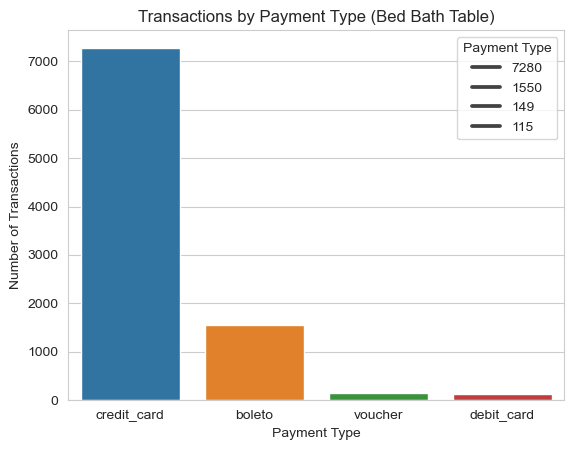

In [114]:
# Set style chart
sns.set_style("whitegrid")

# Membuat Barchart
sns.barplot(x="payment_type", y="number_of_transaction", data=payment_bed_bath_table)

# Menambahkan Label
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.title("Transactions by Payment Type (Bed Bath Table)")
plt.legend(title="Payment Type", labels=payment_bed_bath_table["number_of_transaction"])

# Menampilkan Chart
plt.savefig('bed_bath_table_payment.png')
plt.show()

### Location

In [115]:
# Membuat Tabel Lokasi Customer
bed_bath_table_location = pd.read_sql_query(
    "SELECT customer_state, COUNT(*) AS number_of_transaction FROM table_bersih4 "
    "WHERE product_category_name_english = 'bed_bath_table' "
    "GROUP BY customer_state "
    "ORDER BY number_of_transaction DESC "
,conn)

In [116]:
bed_bath_table_location

,customer_state,number_of_transaction
0,SP,4275
1,RJ,1331
2,MG,1096
3,RS,525
4,PR,391
...,...,...
22,TO,9
23,AM,7
24,AP,3
25,RR,2


C:\Users\farha\AppData\Local\Temp\ipykernel_6328\2720624908.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[i] += f" ({v:,})"


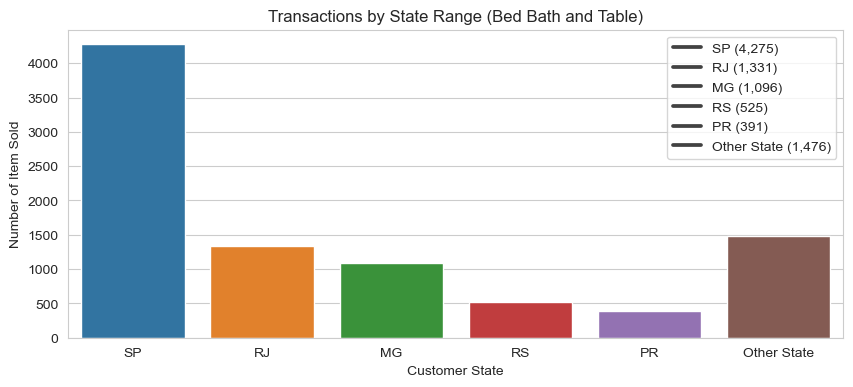

In [127]:
# Me-trim data menjadi 5 teratas penjualan
top_location = bed_bath_table_location.nlargest(5, 'number_of_transaction')

# Menghitung jumlah total 'other' item
other_location = bed_bath_table_location['number_of_transaction'].sum() - top_location['number_of_transaction'].sum()

# Menambahkan 'other' item ke dalam dataframe
top_location.loc[len(top_location)] = ['Other State', other_location]

# Set Style Chart
sns.set_style("whitegrid")

# Membuat Ukuran Chart
plt.figure(figsize=(10, 4))

# Membuat Chart
sns.barplot(x="customer_state", y="number_of_transaction", data=top_location)

# Menambahkan Label dan Title
plt.xlabel("Customer State")
plt.ylabel("Number of Item Sold")
plt.title("Transactions by State Range (Bed Bath and Table)")

# Menambahkan Nilai Ke Label
values = top_location['number_of_transaction']
labels = top_location['customer_state']
for i, v in enumerate(values):
    labels[i] += f" ({v:,})"

plt.legend(labels=labels, loc="best")

# show the chart
plt.savefig('customer_state_bed_bath.png')
plt.show()

In [117]:
# Membuat Tabel Lokasi Customer
health_beauty_location = pd.read_sql_query(
    "SELECT customer_state, COUNT(*) AS number_of_transaction FROM table_bersih4 "
    "WHERE product_category_name_english = 'health_beauty' "
    "GROUP BY customer_state "
    "ORDER BY number_of_transaction DESC "
,conn)

In [122]:
health_beauty_location

,customer_state,number_of_transaction
0,SP,3677
1,MG,982
2,RJ,928
3,RS,389
4,PR,372
...,...,...
22,RO,23
23,AM,15
24,AP,10
25,AC,6


C:\Users\farha\AppData\Local\Temp\ipykernel_6328\936133007.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[i] += f" ({v:,})"


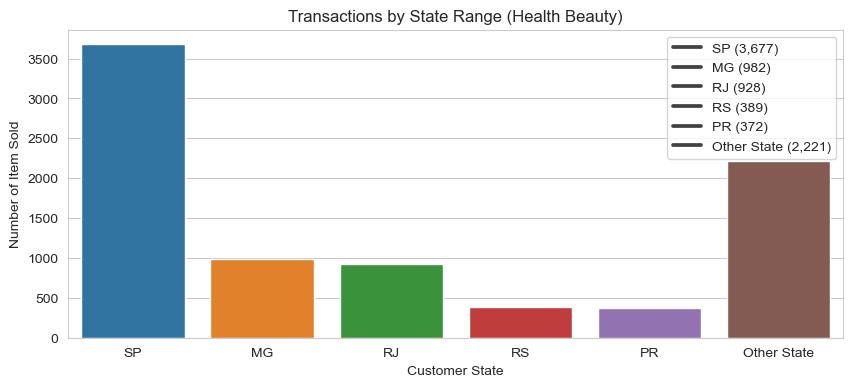

In [126]:
# Me-trim data menjadi 5 teratas penjualan
top_location = health_beauty_location.nlargest(5, 'number_of_transaction')

# Menghitung jumlah total 'other' item
other_location = health_beauty_location['number_of_transaction'].sum() - top_location['number_of_transaction'].sum()

# Menambahkan 'other' item ke dalam dataframe
top_location.loc[len(top_location)] = ['Other State', other_location]

# Set Style Chart
sns.set_style("whitegrid")

# Membuat Ukuran Chart
plt.figure(figsize=(10, 4))

# Membuat Chart
sns.barplot(x="customer_state", y="number_of_transaction", data=top_location)

# Menambahkan Label dan Title
plt.xlabel("Customer State")
plt.ylabel("Number of Item Sold")
plt.title("Transactions by State Range (Health Beauty)")

# Menambahkan Nilai Ke Label
values = top_location['number_of_transaction']
labels = top_location['customer_state']
for i, v in enumerate(values):
    labels[i] += f" ({v:,})"

plt.legend(labels=labels, loc="best")

# show the chart
plt.savefig('customer_state_health_beauty.png')
plt.show()